In [43]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go

In [44]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [45]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [46]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [47]:
df["Levy"].value_counts()

Levy
-       5819
765      486
891      461
639      410
640      405
        ... 
676        1
1678       1
1369       1
328        1
955        1
Name: count, Length: 559, dtype: int64

In [48]:
df["brand_price_mean"] = df.groupby("Manufacturer")["Price"].transform("mean")

In [49]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,brand_price_mean
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,19191.276986
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,14926.368569
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,14291.335722
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,15573.981998
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,14291.335722


In [50]:
df["Mileage"][0]

'186005 km'

In [51]:
df["Wheel"].value_counts()

Wheel
Left wheel          17753
Right-hand drive     1484
Name: count, dtype: int64

In [52]:
cat_feature = df.select_dtypes(include="object")

In [53]:
cat_feature = cat_feature[['Leather interior','Gear box type','Drive wheels','Doors','Wheel']]

In [54]:
cat_feature

,Leather interior,Gear box type,Drive wheels,Doors,Wheel
0,Yes,Automatic,4x4,04-May,Left wheel
1,No,Tiptronic,4x4,04-May,Left wheel
2,No,Variator,Front,04-May,Right-hand drive
3,Yes,Automatic,4x4,04-May,Left wheel
4,Yes,Automatic,Front,04-May,Left wheel
...,...,...,...,...,...
19232,Yes,Manual,Rear,02-Mar,Left wheel
19233,Yes,Tiptronic,Front,04-May,Left wheel
19234,Yes,Automatic,Front,04-May,Left wheel
19235,Yes,Automatic,Front,04-May,Left wheel


In [55]:
df[['Leather interior','Gear box type','Drive wheels','Doors','Wheel']].nunique()

Leather interior    2
Gear box type       4
Drive wheels        3
Doors               3
Wheel               2
dtype: int64

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
OHE = OneHotEncoder(handle_unknown = "ignore", sparse_output = False,drop="first")

In [58]:
encoded = OHE.fit_transform(cat_feature)

In [59]:
cat_cols = ['Leather interior','Gear box type','Drive wheels','Doors','Wheel']

In [60]:
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(cat_cols))

In [61]:
encoded_df.head()

,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [62]:
numeric_features = df.select_dtypes(include = ["int64", "float64"])

In [63]:
numeric_features = numeric_features.drop(columns=["ID","brand_price_mean"])
numeric_features.head()

,Price,Prod. year,Cylinders,Airbags
0,13328,2010,6.0,12
1,16621,2011,6.0,8
2,8467,2006,4.0,2
3,3607,2011,4.0,0
4,11726,2014,4.0,4


In [64]:
update_df = pd.concat([numeric_features, encoded_df], axis = 1)
update_df.head()

,Price,Prod. year,Cylinders,Airbags,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
0,13328,2010,6.0,12,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,16621,2011,6.0,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8467,2006,4.0,2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,3607,2011,4.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11726,2014,4.0,4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [65]:
corr = update_df.corr()

In [66]:
import plotly.express as px

In [67]:
px.imshow(corr,text_auto=True, width=1000, height = 800)

In [68]:
x = update_df.drop("Price", axis = 1)
y = update_df["Price"]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2,      # 80-20 split
    random_state=42     # For reproducibility
)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Don't fit on test!

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Start with simple model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [72]:
print(x.shape, y.shape)


(19237, 12) (19237,)


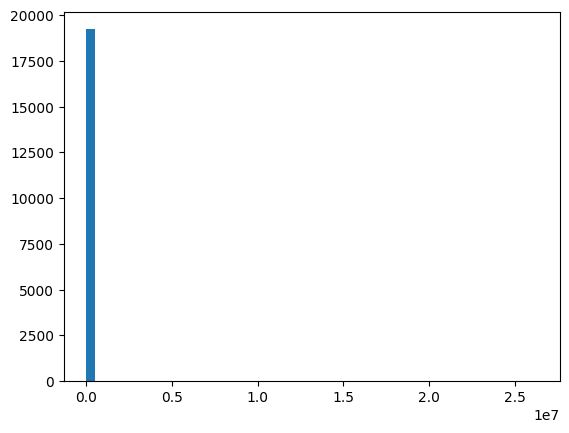

In [73]:
import matplotlib.pyplot as plt
plt.hist(y, bins=50)
plt.show()


In [74]:
import numpy as np

q_low = y.quantile(0.01)
q_high = y.quantile(0.99)

mask = (y >= q_low) & (y <= q_high)
x_filtered = x[mask]
y_filtered = y[mask]

print(x_filtered.shape, y_filtered.shape)


(18864, 12) (18864,)


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 12749.8226026036
RMSE: 18939.620691276392
R2: -0.15119746180590177


In [76]:
# Make sure Price isn't in your features
print("Features used:", X_train.columns.tolist())
print("Any 'Price' in features?", 'Price' in X_train.columns)

Features used: ['Prod. year', 'Cylinders', 'Airbags', 'Leather interior_Yes', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_Front', 'Drive wheels_Rear', 'Doors_04-May', 'Doors_>5', 'Wheel_Right-hand drive']
Any 'Price' in features? False


In [77]:
# Check if you scaled the data
print("Feature ranges:")
X_train.describe()

Feature ranges:


,Prod. year,Cylinders,Airbags,Leather interior_Yes,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_04-May,Doors_>5,Wheel_Right-hand drive
count,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.000000,15389.00000,15389.000000,15389.000000,15389.000000
mean,2010.944181,4.579635,6.572942,0.727468,0.096562,0.161544,0.038599,0.671844,0.12132,0.952823,0.007408,0.076028
std,5.637089,1.194924,4.326692,0.445277,0.295371,0.368044,0.192644,0.469557,0.32651,0.212023,0.085752,0.265052
min,1939.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2009.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,2012.000000,4.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000
75%,2015.000000,4.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000
max,2020.000000,16.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [78]:
import numpy as np

y_log = np.log1p(y)   # log(1 + y) to avoid log(0)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_log = model.predict(x_test)
y_pred = np.expm1(y_pred_log)  # reverse log transform
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 7361.896913528628
RMSE: 12991.326289361228
R2: 0.4583556084882392


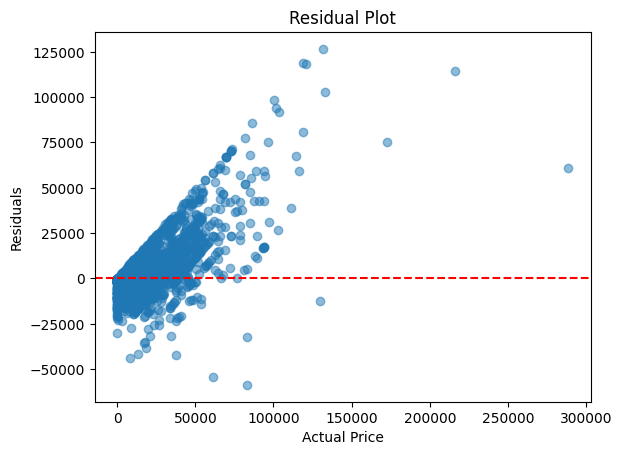

In [81]:
import matplotlib.pyplot as plt

residuals = y_test_actual - y_pred
plt.scatter(y_test_actual, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


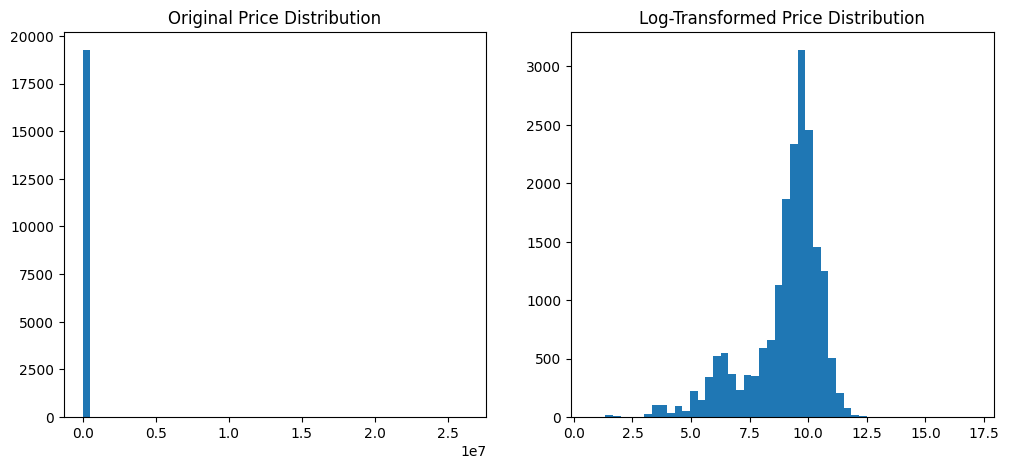

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].hist(y, bins=50)
axes[0].set_title("Original Price Distribution")

axes[1].hist(np.log1p(y), bins=50)
axes[1].set_title("Log-Transformed Price Distribution")

plt.show()


In [83]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train on log-transformed target
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(x_train, y_train)

# Predictions
y_pred_log = xgb_model.predict(x_test)

# Convert back from log
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("XGBoost Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


XGBoost Results
MAE: 7516.860945100844
RMSE: 13909.963071798498
R2: 0.3790462940165248


In [84]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid
param_dist = {
    "n_estimators": [200, 400, 600, 800, 1000],
    "max_depth": [3, 4, 5, 6, 7, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 3, 5, 7, 10]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,              # try 25 random combos
    scoring="neg_mean_squared_error",
    cv=3,                   # 3-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(x_test)

# Convert back from log
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("Tuned XGBoost Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Tuned XGBoost Results
MAE: 7404.510238239027
RMSE: 13122.912351175148
R2: 0.44732766512151767


In [85]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Tell CatBoost which columns are categorical (use indices of categorical features)
# Example: if your categorical columns are [0, 2, 5] in x_train
categorical_features = [col for col in x_train.columns if x_train[col].dtype == "object"]

cat_model = CatBoostRegressor(
    iterations=1000,         # number of trees
    learning_rate=0.05,      # smaller LR for smoother learning
    depth=8,                 # tree depth
    loss_function="RMSE",
    eval_metric="RMSE",
    random_seed=42,
    verbose=200
)

# Fit model (CatBoost can take cat features directly)
cat_model.fit(x_train, y_train, cat_features=categorical_features, eval_set=(x_test, y_test), use_best_model=True)

# Predictions
y_pred_log = cat_model.predict(x_test)

# Convert back from log
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# Evaluation
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("CatBoost Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


0:	learn: 1.5638474	test: 1.5318610	best: 1.5318610 (0)	total: 149ms	remaining: 2m 28s
200:	learn: 1.1691675	test: 1.1820794	best: 1.1820794 (200)	total: 912ms	remaining: 3.63s
400:	learn: 1.1415578	test: 1.1736857	best: 1.1735465 (399)	total: 1.72s	remaining: 2.56s
600:	learn: 1.1262491	test: 1.1716367	best: 1.1714028 (574)	total: 2.51s	remaining: 1.67s
800:	learn: 1.1153431	test: 1.1729481	best: 1.1714028 (574)	total: 3.29s	remaining: 818ms
999:	learn: 1.1060089	test: 1.1741644	best: 1.1714028 (574)	total: 4.08s	remaining: 0us

bestTest = 1.171402809
bestIteration = 574

Shrink model to first 575 iterations.
CatBoost Results
MAE: 7416.149322845884
RMSE: 13304.417135275642
R2: 0.43193376638586056


In [86]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

# Base model
cat_model = CatBoostRegressor(
    verbose=0, 
    random_state=42, 
    early_stopping_rounds=100
)

# Parameter space for tuning
param_dist = {
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "iterations": [500, 1000, 1500],
    "l2_leaf_reg": [3, 5, 10, 15],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bylevel": [0.7, 0.8, 0.9, 1.0]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=20,           # number of random samples
    scoring="r2",        # optimize for R2
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
random_search.fit(X_train, y_train, eval_set=(X_test, y_test))

print("Best Parameters:", random_search.best_params_)

# Evaluate best model
best_cat = random_search.best_estimator_
y_pred_log = best_cat.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("CatBoost Tuned Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.9, 'learning_rate': 0.03, 'l2_leaf_reg': 10, 'iterations': 1000, 'depth': 10, 'colsample_bylevel': 0.9}
CatBoost Tuned Results
MAE: 7334.2729587463655
RMSE: 13044.605596554979
R2: 0.4539037744577564


C:\Users\Asus\AppData\Local\Temp\ipykernel_3352\1525570980.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




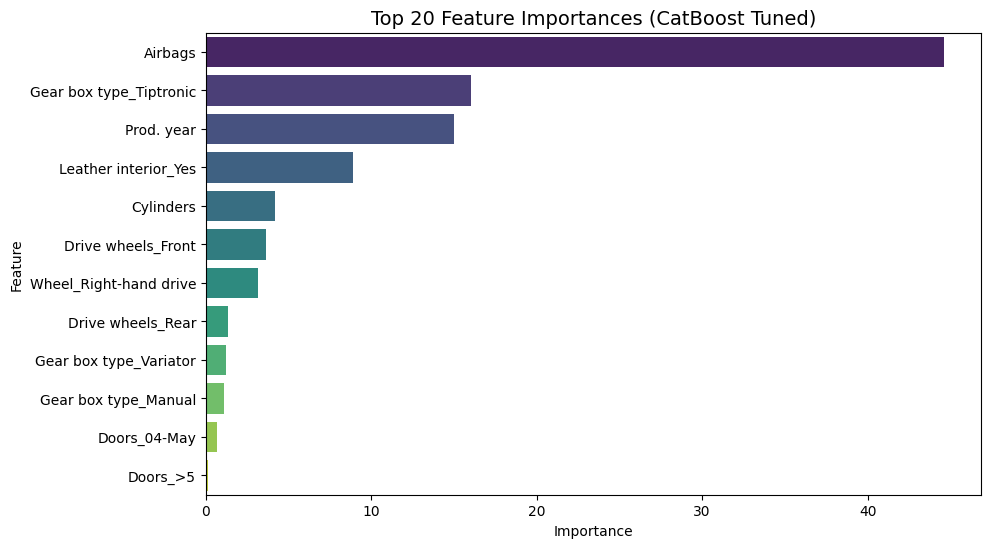

In [87]:
from catboost import Pool
import seaborn as sns

# Use the trained/tuned CatBoost model
train_pool = Pool(X_train, y_train)

feature_importances = random_search.best_estimator_.get_feature_importance(train_pool)

importances_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df.head(20), palette="viridis")
plt.title("Top 20 Feature Importances (CatBoost Tuned)", fontsize=14)
plt.show()


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor(n_estimators=500, max_depth=None, random_state=0, n_jobs=-1)
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=5)
print(rfr_scores.mean())
etr = ExtraTreesRegressor(n_estimators=500, max_depth=None, random_state=0, n_jobs=-1)
etr_scores = cross_val_score(etr, X_train, y_train,cv=5)
print(etr_scores.mean())
dtr = DecisionTreeRegressor( max_depth=None, max_leaf_nodes=None,min_samples_split=2,random_state=0)
dtr_Scores = cross_val_score(dtr,X_train, y_train)
print(dtr_Scores.mean())

0.38588005235515366
0.3663955832347
0.301947580222913


In [89]:
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor

# Define base models
cat = CatBoostRegressor(
    iterations=1000, learning_rate=0.03, depth=10,
    subsample=0.9, colsample_bylevel=0.9, l2_leaf_reg=10,
    random_seed=0, verbose=0
)

rfr = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=-1)
etr = ExtraTreesRegressor(n_estimators=500, random_state=0, n_jobs=-1)
dtr = DecisionTreeRegressor(random_state=0)

# Create ensemble
voting_reg = VotingRegressor([
    ('cat', cat),
    ('rf', rfr),
    ('et', etr),
    ('dt', dtr)
])

# Evaluate with cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(voting_reg, X_train, y_train, cv=5, scoring="r2")
print("Voting Regressor R²:", np.mean(scores))


Voting Regressor R²: 0.4009281301685405


In [94]:
print(x_train.shape, y_train.shape)

(15389, 12) (15389,)


In [91]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import LinearRegression

# stacking_reg = StackingRegressor(
#     estimators=[
#         ('cat', cat),
#         ('rf', rfr),
#         ('et', etr),
#         ('dt', dtr)
#     ],
#     final_estimator=LinearRegression(),   # meta-model
#     n_jobs=-1
# )

# scores = cross_val_score(stacking_reg, X_train, y_train, cv=5, scoring="r2")
# print("Stacking Regressor R²:", np.mean(scores))


In [99]:
# 📦 Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# =====================
# 1. Define Models
# =====================
cat = CatBoostRegressor(
    iterations=300, learning_rate=0.03, depth=10,
    subsample=0.9, colsample_bylevel=0.9, l2_leaf_reg=10,
    random_seed=0, verbose=0
)

lgbm = LGBMRegressor(
    n_estimators=300, learning_rate=0.03, max_depth=10,
    subsample=0.9, colsample_bytree=0.9, reg_lambda=10,
    random_state=0, n_jobs=4, verbose=-1
)

xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.03, max_depth=10,
    subsample=0.9, colsample_bytree=0.9, reg_lambda=10,
    random_state=0, n_jobs=4, verbosity=0
)

# =====================
# 2. Define Metrics
# =====================
def rmse(y_true, y_pred, **kwargs):
    return mean_squared_error(y_true, y_pred, squared=False)

scoring = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "RMSE": make_scorer(rmse, greater_is_better=False),
    "R2": make_scorer(r2_score)
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)  # use 3 folds for speed while testing

# =====================
# 3. Evaluate Each Model
# =====================
models = {"CatBoost": cat, "LightGBM": lgbm, "XGBoost": xgb}

results = {}
for name, model in models.items():
    scores = {metric: cross_val_score(model, X_train, y_train, cv=cv, scoring=sc) 
              for metric, sc in scoring.items()}
    results[name] = {
        m: f"{np.mean(s) * (-1 if m in ['MAE','RMSE'] else 1):.4f} ± {np.std(s):.4f}"
        for m, s in scores.items()
    }

print("\n🔎 Individual Model Performance (mean ± std):")
for model, metrics in results.items():
    print(f"\n📌 {model}")
    for metric, value in metrics.items():
        print(f"   {metric}: {value}")

# =====================
# 4. Stacking Ensemble
# =====================
stacking_reg = StackingRegressor(
    estimators=[("cat", cat), ("lgbm", lgbm), ("xgb", xgb)],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

scores = {metric: cross_val_score(stacking_reg, X_train, y_train, cv=cv, scoring=sc) 
          for metric, sc in scoring.items()}
stacking_results = {
    m: f"{np.mean(s) * (-1 if m in ['MAE','RMSE'] else 1):.4f} ± {np.std(s):.4f}"
    for m, s in scores.items()
}

print("\n🤖 Stacking Ensemble Performance:")
for metric, value in stacking_results.items():
    print(f"   {metric}: {value}")



🔎 Individual Model Performance (mean ± std):

📌 CatBoost
   MAE: 0.7836 ± 0.0068
   RMSE: nan ± nan
   R2: 0.4280 ± 0.0089

📌 LightGBM
   MAE: 0.7800 ± 0.0079
   RMSE: nan ± nan
   R2: 0.4259 ± 0.0103

📌 XGBoost
   MAE: 0.7711 ± 0.0106
   RMSE: nan ± nan
   R2: 0.4304 ± 0.0160

🤖 Stacking Ensemble Performance:
   MAE: 0.7709 ± 0.0075
   RMSE: nan ± nan
   R2: 0.4367 ± 0.0113


In [101]:
# 📦 Imports
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use your best model (stacking ensemble)
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# =====================
# 1. Define base models
# =====================
cat = CatBoostRegressor(
    iterations=300, learning_rate=0.03, depth=10,
    subsample=0.9, colsample_bylevel=0.9, l2_leaf_reg=10,
    random_seed=0, verbose=0
)

lgbm = LGBMRegressor(
    n_estimators=300, learning_rate=0.03, max_depth=10,
    subsample=0.9, colsample_bytree=0.9, reg_lambda=10,
    random_state=0, n_jobs=4, verbose=-1
)

xgb = XGBRegressor(
    n_estimators=300, learning_rate=0.03, max_depth=10,
    subsample=0.9, colsample_bytree=0.9, reg_lambda=10,
    random_state=0, n_jobs=4, verbosity=0
)

# =====================
# 2. Stacking Ensemble
# =====================
stacking_reg = StackingRegressor(
    estimators=[("cat", cat), ("lgbm", lgbm), ("xgb", xgb)],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

# =====================
# 3. Train model
# =====================
print("🔄 Training stacking model on full training data...")
stacking_reg.fit(X_train, y_train)

# =====================
# 4. Make predictions
# =====================
y_pred = stacking_reg.predict(X_test)

# =====================
# 5. Evaluate
# =====================
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Test Set Performance:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


🔄 Training stacking model on full training data...

📊 Test Set Performance:
MAE  : 0.7427
RMSE : 1.3560
R²   : 0.4426


In [102]:
import plotly.express as px
import plotly.graph_objects as go

# =====================
# 1. Evaluate Metrics
# =====================
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manual RMSE
r2 = r2_score(y_test, y_pred)

print("\n📊 Test Set Performance:")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# =====================
# 2. Scatter Plot (Actual vs Predicted)
# =====================
fig1 = px.scatter(
    x=y_test, y=y_pred,
    labels={'x':"Actual Prices", 'y':"Predicted Prices"},
    title="Actual vs Predicted Car Prices",
    opacity=0.6
)
fig1.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode="lines",
    line=dict(color="red", dash="dash"),
    name="Ideal Fit"
))
fig1.show()

# =====================
# 3. Residual Histogram
# =====================
residuals = y_test - y_pred
fig2 = px.histogram(
    residuals, nbins=30, title="Residual Distribution",
    labels={"value": "Residual (Actual - Predicted)"}
)
fig2.add_vline(x=0, line_color="red", line_dash="dash")
fig2.show()

# =====================
# 4. Residuals vs Predicted
# =====================
fig3 = px.scatter(
    x=y_pred, y=residuals,
    labels={'x':"Predicted Prices", 'y':"Residuals"},
    title="Residuals vs Predicted",
    opacity=0.6
)
fig3.add_hline(y=0, line_color="red", line_dash="dash")
fig3.show()



📊 Test Set Performance:
MAE  : 0.7427
RMSE : 1.1645
R²   : 0.4426
